__Imports__

In [307]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize
#nltk.download()

__Read in Data__

In [308]:
df_1 = pd.read_csv("data/train.csv")
df_1.head()

,id,anchor,target,context,score
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75
2,36d72442aefd8232,abatement,active catalyst,A47,0.25
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00


In [309]:
df_1.describe()

,score
count,36473.000000
mean,0.362062
std,0.258335
min,0.000000
25%,0.250000
50%,0.250000
75%,0.500000
max,1.000000


In [310]:
df_1.isnull().any()

id         False
anchor     False
target     False
context    False
score      False
dtype: bool

__This is the amount of words in each row with respect to the column__
* Must be applied to anchor and target

In [311]:
np.unique(np.array(df_1['context']))

array(['A01', 'A21', 'A22', 'A23', 'A24', 'A41', 'A43', 'A44', 'A45',
       'A46', 'A47', 'A61', 'A62', 'A63', 'B01', 'B02', 'B03', 'B05',
       'B07', 'B08', 'B21', 'B22', 'B23', 'B24', 'B25', 'B27', 'B28',
       'B29', 'B31', 'B32', 'B41', 'B44', 'B60', 'B61', 'B62', 'B63',
       'B64', 'B65', 'B66', 'B67', 'B81', 'C01', 'C02', 'C03', 'C04',
       'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12', 'C13', 'C14',
       'C21', 'C22', 'C23', 'C25', 'D01', 'D03', 'D04', 'D05', 'D06',
       'D21', 'E01', 'E02', 'E03', 'E04', 'E05', 'E06', 'E21', 'F01',
       'F02', 'F03', 'F04', 'F15', 'F16', 'F17', 'F21', 'F22', 'F23',
       'F24', 'F25', 'F26', 'F27', 'F28', 'F41', 'F42', 'G01', 'G02',
       'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'G11',
       'G16', 'G21', 'H01', 'H02', 'H03', 'H04', 'H05'], dtype=object)

These are the unique amount of words in __anchor__ column max is 5

In [312]:
print(np.unique(np.array(df_1['anchor'].apply(lambda x : len(x.split())))))

[1 2 3 4 5]


These are the unique amount of words in __target__ column max is 15

In [313]:
print(np.unique(np.array(df_1['target'].apply(lambda x : len(x.split())))))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 15]


We can drop __context__ because its a label

In [314]:
print(np.unique(np.array(df_1['context'].apply(lambda x : len(x.split())))))

[1]


__Tokenization__

In [315]:
from nltk.tokenize import word_tokenize
df_1['target'] = df_1['target'].apply(lambda x : word_tokenize(x))
df_1['anchor'] = df_1['anchor'].apply(lambda x : word_tokenize(x))

In [316]:
df_1.head()

,id,anchor,target,context,score
0,37d61fd2272659b1,[abatement],"[abatement, of, pollution]",A47,0.50
1,7b9652b17b68b7a4,[abatement],"[act, of, abating]",A47,0.75
2,36d72442aefd8232,[abatement],"[active, catalyst]",A47,0.25
3,5296b0c19e1ce60e,[abatement],"[eliminating, process]",A47,0.50
4,54c1e3b9184cb5b6,[abatement],"[forest, region]",A47,0.00


__Stopwords Removal__

In [317]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df_1['target'] = df_1['target'].apply(lambda x : [w for w in x if not w in stop_words])
df_1['anchor'] = df_1['anchor'].apply(lambda x : [w for w in x if not w in stop_words])

In [318]:
df_1.head()

,id,anchor,target,context,score
0,37d61fd2272659b1,[abatement],"[abatement, pollution]",A47,0.50
1,7b9652b17b68b7a4,[abatement],"[act, abating]",A47,0.75
2,36d72442aefd8232,[abatement],"[active, catalyst]",A47,0.25
3,5296b0c19e1ce60e,[abatement],"[eliminating, process]",A47,0.50
4,54c1e3b9184cb5b6,[abatement],"[forest, region]",A47,0.00


__Stemming__

In [319]:
from nltk.stem.snowball import SnowballStemmer
snowBallStemmer = SnowballStemmer("english")
df_1['target'] = df_1['target'].apply(lambda x : [snowBallStemmer.stem(word) for word in x])
df_1['anchor'] = df_1['anchor'].apply(lambda x: [snowBallStemmer.stem(word) for word in x])

In [320]:
df_1.head()

,id,anchor,target,context,score
0,37d61fd2272659b1,[abat],"[abat, pollut]",A47,0.50
1,7b9652b17b68b7a4,[abat],"[act, abat]",A47,0.75
2,36d72442aefd8232,[abat],"[activ, catalyst]",A47,0.25
3,5296b0c19e1ce60e,[abat],"[elimin, process]",A47,0.50
4,54c1e3b9184cb5b6,[abat],"[forest, region]",A47,0.00


__Need to convert array to just strings__

In [321]:
df_1['anchor'] = df_1['anchor'].apply(lambda x : ','.join(map(str,x)))
df_1['target'] = df_1['target'].apply(lambda x : ','.join(map(str,x)))

In [322]:
df_1.head()

,id,anchor,target,context,score
0,37d61fd2272659b1,abat,"abat,pollut",A47,0.50
1,7b9652b17b68b7a4,abat,"act,abat",A47,0.75
2,36d72442aefd8232,abat,"activ,catalyst",A47,0.25
3,5296b0c19e1ce60e,abat,"elimin,process",A47,0.50
4,54c1e3b9184cb5b6,abat,"forest,region",A47,0.00


__Spacy Similarity__

In [323]:
# import spacy
# nlp = spacy.load("en_core_web_lg")

In [324]:
# df_1.apply(lambda x: nlp(x['anchor']).similarity(nlp(x['target'])),axis=1)

__Pytorch Transformation Similarity__

In [325]:
# from sentence_transformers import SentenceTransformer
# model = SentenceTransformer('distilbert-base-nli-mean-tokens')

In [326]:
# temp = df_1[:100].apply(lambda x: model.encode(x['anchor']),axis=1)

In [327]:
# temp = pd.DataFrame(temp)

In [328]:
# temp['target'] = df_1[:100].apply(lambda x: model.encode(x['target']),axis=1)

In [329]:
# temp.columns = ['anchor','target']

In [330]:
# from sentence_transformers import SentenceTransformer, util
# temp.apply(lambda x: util.pytorch_cos_sim(x['anchor'], x['target']),axis=1)

__Distance Similarity__

In [331]:
# from scipy.spatial import distance

In [332]:
# temp.apply(lambda x: 1-distance.cosine(x['anchor'], x['target']),axis=1)

__Sentence similarity with TFHub Universal Sentence Encoder__

In [336]:
temp = df_1[:100]

In [334]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [338]:
temp['anchor_embed'] = df_1.apply(lambda x: embed([x['anchor']]),axis=1)
temp['target_embed'] = df_1.apply(lambda x: embed([x['target']]),axis=1)

C:\Users\Michael\AppData\Local\Temp\ipykernel_11584\233998626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['anchor_embed'] = df_1.apply(lambda x: embed([x['anchor']]),axis=1)
C:\Users\Michael\AppData\Local\Temp\ipykernel_11584\233998626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['target_embed'] = df_1.apply(lambda x: embed([x['target']]),axis=1)


In [339]:
temp

,id,anchor,target,context,score,anchor_embed,target_embed
0,37d61fd2272659b1,abat,"abat,pollut",A47,0.50,"((tf.Tensor(-0.021891922, shape=(), dtype=floa...","((tf.Tensor(-0.0053562843, shape=(), dtype=flo..."
1,7b9652b17b68b7a4,abat,"act,abat",A47,0.75,"((tf.Tensor(-0.021891922, shape=(), dtype=floa...","((tf.Tensor(-0.00037184125, shape=(), dtype=fl..."
2,36d72442aefd8232,abat,"activ,catalyst",A47,0.25,"((tf.Tensor(-0.021891922, shape=(), dtype=floa...","((tf.Tensor(0.06614148, shape=(), dtype=float3..."
3,5296b0c19e1ce60e,abat,"elimin,process",A47,0.50,"((tf.Tensor(-0.021891922, shape=(), dtype=floa...","((tf.Tensor(0.03737327, shape=(), dtype=float3..."
4,54c1e3b9184cb5b6,abat,"forest,region",A47,0.00,"((tf.Tensor(-0.021891922, shape=(), dtype=floa...","((tf.Tensor(0.038310297, shape=(), dtype=float..."
...,...,...,...,...,...,...,...
95,4285cdf2221cc6d5,"abnorm,posit",situat,D03,0.25,"((tf.Tensor(-0.008336243, shape=(), dtype=floa...","((tf.Tensor(-0.008253895, shape=(), dtype=floa..."
96,f6b53890ef57f9c5,"abnorm,posit","unexpect,posit",D03,0.75,"((tf.Tensor(-0.008336243, shape=(), dtype=floa...","((tf.Tensor(-0.014504965, shape=(), dtype=floa..."
97,414373bc5329e819,"abnorm,posit",unison,D03,0.00,"((tf.Tensor(-0.008336243, shape=(), dtype=floa...","((tf.Tensor(0.014630878, shape=(), dtype=float..."
98,d2304657a1e12333,"abnorm,posit","unus,arrang",D03,0.50,"((tf.Tensor(-0.008336243, shape=(), dtype=floa...","((tf.Tensor(-0.029108731, shape=(), dtype=floa..."


In [356]:
len(np.array(temp['anchor_embed'][0])[0])

512

In [357]:
len(np.array(temp['target_embed'][0])[0])

512

In [375]:
df = pd.DataFrame(np.reshape(temp['target_embed'][0][0],newshape=(1,-1)))
anchor_arr = []
for i in df.columns:
    prefix = "anchor_" + str(i)
    anchor_arr.append(prefix)
df.columns = anch

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
__add dataframe

In [373]:
temp.join(df)

,id,anchor,target,context,score,anchor_embed,target_embed,0,1,2,...,502,503,504,505,506,507,508,509,510,511
0,37d61fd2272659b1,abat,"abat,pollut",A47,0.50,"((tf.Tensor(-0.021891922, shape=(), dtype=floa...","((tf.Tensor(-0.0053562843, shape=(), dtype=flo...",-0.005356,-0.001484,0.061704,...,0.020012,-0.138102,0.071872,0.033172,-0.024552,-0.024941,-0.025884,-0.063254,0.006475,0.026946
1,7b9652b17b68b7a4,abat,"act,abat",A47,0.75,"((tf.Tensor(-0.021891922, shape=(), dtype=floa...","((tf.Tensor(-0.00037184125, shape=(), dtype=fl...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36d72442aefd8232,abat,"activ,catalyst",A47,0.25,"((tf.Tensor(-0.021891922, shape=(), dtype=floa...","((tf.Tensor(0.06614148, shape=(), dtype=float3...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5296b0c19e1ce60e,abat,"elimin,process",A47,0.50,"((tf.Tensor(-0.021891922, shape=(), dtype=floa...","((tf.Tensor(0.03737327, shape=(), dtype=float3...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54c1e3b9184cb5b6,abat,"forest,region",A47,0.00,"((tf.Tensor(-0.021891922, shape=(), dtype=floa...","((tf.Tensor(0.038310297, shape=(), dtype=float...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4285cdf2221cc6d5,"abnorm,posit",situat,D03,0.25,"((tf.Tensor(-0.008336243, shape=(), dtype=floa...","((tf.Tensor(-0.008253895, shape=(), dtype=floa...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,f6b53890ef57f9c5,"abnorm,posit","unexpect,posit",D03,0.75,"((tf.Tensor(-0.008336243, shape=(), dtype=floa...","((tf.Tensor(-0.014504965, shape=(), dtype=floa...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,414373bc5329e819,"abnorm,posit",unison,D03,0.00,"((tf.Tensor(-0.008336243, shape=(), dtype=floa...","((tf.Tensor(0.014630878, shape=(), dtype=float...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,d2304657a1e12333,"abnorm,posit","unus,arrang",D03,0.50,"((tf.Tensor(-0.008336243, shape=(), dtype=floa...","((tf.Tensor(-0.029108731, shape=(), dtype=floa...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [352]:
from scipy.spatial import distance

temp.apply(lambda x: 1 - distance.cosine(x['anchor_embed'],x['target_embed']),axis=1)

0     0.368084
1     0.500184
2     0.234025
3     0.265823
4     0.422346
        ...   
95    0.432669
96    0.416829
97    0.174984
98    0.369552
99    0.239910
Length: 100, dtype: float64

__bert Scoring__

In [ ]:
# from bert_score import BERTScorer

In [ ]:
# scorer = BERTScorer(lang="en", rescale_with_baseline=True)

In [ ]:
# x = temp.apply(lambda x: scorer.score([x['anchor']],[x['target']])[2].mean(),axis=1)

In [ ]:
# float(x[0])

These the the unique words in the __anchor__ column 10 are shown below

In [109]:
np.unique(np.array(df_1['anchor']))[:10]

array(['abat', 'abnorm,posit', 'absorb,properti', 'acan', 'accept,inform',
       'achiev,authent', 'acid,absorpt', 'ack', 'acoustoopt,modul',
       'acryl,group'], dtype=object)

These the the unique words in the __target__ column 10 are shown below

In [110]:
np.unique(np.array(df_1['target']))[:10]

array(['', '1,amino,2,methoxyethan', '1,azabicyclo', '1,bromopropan',
       '1,methoxi,2,aminoethan', '10,bit,dac',
       '111444,hexafluoro,2,buten', '12,dibromopropan',
       '120,degre,interv', '12cao7al2o3'], dtype=object)

We have the issue of words going together, we need to seperate these so we can
we need to seperate the lengths

Sets are important here because sets can only contain unique values

In [111]:
anchor_set = set()
target_set = set()

These functions are not meant to return anything but to get the words into the set very quickly using a lambda function

In [112]:
def separator_anchor(arr):
    for i in arr:
        anchor_set.add(i)

In [113]:
def separator_target(arr):
    for i in arr:
        target_set.add(i)

In [114]:
df_1['anchor'] = df_1['anchor'].apply(lambda x: x.split(','))
df_1['target'] = df_1['target'].apply(lambda x: x.split(','))

In [115]:
df_1['anchor'].apply(lambda x: separator_anchor(x))
df_1['target'].apply(lambda x: separator_target(x))

0        None
1        None
2        None
3        None
4        None
         ... 
36468    None
36469    None
36470    None
36471    None
36472    None
Name: target, Length: 36473, dtype: object

__list comprehension__

In [116]:
# anchor_arr = [i for i in anchor_set]
# target_arr = [i for i in target_set]
df_1['context']
entire = target_set.union(anchor_set)
entire = [i for i in entire]

__Label Encoding__

In [117]:
# labelencoder_anchor = LabelEncoder()
# labelencoder_anchor.fit(anchor_arr)
# labelencoder_target = LabelEncoder()
# labelencoder_target.fit(target_arr)
labelencoder = LabelEncoder()
labelencoder.fit(entire)
labelencoder_context = LabelEncoder()
df_1['context'] = labelencoder_context.fit_transform(df_1['context'])

In [118]:
def encoding_anchor(arr):
    temp = []
    if len(arr) < 2:
        for i in arr:
            return labelencoder_anchor.transform([i])
    if len(arr) > 1:
        for i in arr:
            temp.extend(labelencoder_anchor.transform([i]))
        return temp

In [119]:
def encoding_target(arr):
    temp = []
    if len(arr) < 2:
        for i in arr:
            return labelencoder_target.transform([i])
    if len(arr) > 1:
        for i in arr:
            temp.extend(labelencoder_target.transform([i]))
        return temp

In [120]:
def encoding(arr):
    temp = []
    if len(arr) < 2:
        for i in arr:
            return labelencoder.transform([i])
    if len(arr) > 1:
        for i in arr:
            temp.extend(labelencoder.transform([i]))
        return temp

In [121]:
# df_1['anchor'] = df_1['anchor'].apply(lambda x: encoding_anchor(x))

In [122]:
# df_1['target'] = df_1['target'].apply(lambda x: encoding_target(x))

In [123]:
df_1['anchor'] = df_1['anchor'].apply(lambda x: encoding(x))

In [124]:
df_1['target'] = df_1['target'].apply(lambda x: encoding(x))

In [125]:
df_1.head()

,id,anchor,target,context,score
0,37d61fd2272659b1,[35],"[35, 4129]",10,0.50
1,7b9652b17b68b7a4,[35],"[85, 35]",10,0.75
2,36d72442aefd8232,[35],"[87, 858]",10,0.25
3,5296b0c19e1ce60e,[35],"[1809, 4278]",10,0.50
4,54c1e3b9184cb5b6,[35],"[2188, 4518]",10,0.00


5 words max is anchor
15 words max is target

In [126]:
l1 = []
l2 = []
l3 = []
l4 = []
l5 = []

for i in np.array(df_1['anchor']):
    if len(i) == 1:
        l1.append(i[0])
        l2.append(np.nan)
        l3.append(np.nan)
        l4.append(np.nan)
        l5.append(np.nan)
    if len(i) == 2:
        l1.append(i[0])
        l2.append(i[1])
        l3.append(np.nan)
        l4.append(np.nan)
        l5.append(np.nan)
    if len(i) == 3:
        l1.append(i[0])
        l2.append(i[1])
        l3.append(i[2])
        l4.append(np.nan)
        l5.append(np.nan)
    if len(i) == 4:
        l1.append(i[0])
        l2.append(i[1])
        l3.append(i[2])
        l4.append(i[3])
        l5.append(np.nan)
    if len(i) == 5:
        l1.append(i[0])
        l2.append(i[1])
        l3.append(i[2])
        l4.append(i[3])
        l5.append(i[4])

In [127]:
df_1['anchor_1'] = np.array(l1)
df_1['anchor_2'] = np.array(l2)
df_1['anchor_3'] = np.array(l3)
df_1['anchor_4'] = np.array(l4)
df_1['anchor_5'] = np.array(l5)

In [128]:
df_1.head()

,id,anchor,target,context,score,anchor_1,anchor_2,anchor_3,anchor_4,anchor_5
0,37d61fd2272659b1,[35],"[35, 4129]",10,0.50,35,NaN,NaN,NaN,NaN
1,7b9652b17b68b7a4,[35],"[85, 35]",10,0.75,35,NaN,NaN,NaN,NaN
2,36d72442aefd8232,[35],"[87, 858]",10,0.25,35,NaN,NaN,NaN,NaN
3,5296b0c19e1ce60e,[35],"[1809, 4278]",10,0.50,35,NaN,NaN,NaN,NaN
4,54c1e3b9184cb5b6,[35],"[2188, 4518]",10,0.00,35,NaN,NaN,NaN,NaN


__Target Reformat Values__

In [129]:
l1 = []
l2 = []
l3 = []
l4 = []
l5 = []
l6 = []
l7 = []
l8 = []
l9 = []
l10 = []
l11 = []
l12 = []
l13 = []
l14 = []
l15 = []
for i in np.array(df_1['target']):
    if len(i) == 1:
        l1.append(i[0])
        l2.append(np.nan)
        l3.append(np.nan)
        l4.append(np.nan)
        l5.append(np.nan)
        l6.append(np.nan)
        l7.append(np.nan)
        l8.append(np.nan)
        l9.append(np.nan)
        l10.append(np.nan)
        l11.append(np.nan)
        l12.append(np.nan)
        l13.append(np.nan)
        l14.append(np.nan)
        l15.append(np.nan)
        
    if len(i) == 2:
        l1.append(i[0])
        l2.append(i[1])
        l3.append(np.nan)
        l4.append(np.nan)
        l5.append(np.nan)
        l6.append(np.nan)
        l7.append(np.nan)
        l8.append(np.nan)
        l9.append(np.nan)
        l10.append(np.nan)
        l11.append(np.nan)
        l12.append(np.nan)
        l13.append(np.nan)
        l14.append(np.nan)
        l15.append(np.nan)
    if len(i) == 3:
        l1.append(i[0])
        l2.append(i[1])
        l3.append(i[2])
        l4.append(np.nan)
        l5.append(np.nan)
        l6.append(np.nan)
        l7.append(np.nan)
        l8.append(np.nan)
        l9.append(np.nan)
        l10.append(np.nan)
        l11.append(np.nan)
        l12.append(np.nan)
        l13.append(np.nan)
        l14.append(np.nan)
        l15.append(np.nan)
    if len(i) == 4:
        l1.append(i[0])
        l2.append(i[1])
        l3.append(i[2])
        l4.append(i[3])
        l5.append(np.nan)
        l6.append(np.nan)
        l7.append(np.nan)
        l8.append(np.nan)
        l9.append(np.nan)
        l10.append(np.nan)
        l11.append(np.nan)
        l12.append(np.nan)
        l13.append(np.nan)
        l14.append(np.nan)
        l15.append(np.nan)
    if len(i) == 5:
        l1.append(i[0])
        l2.append(i[1])
        l3.append(i[2])
        l4.append(i[3])
        l5.append(i[4])
        l6.append(np.nan)
        l7.append(np.nan)
        l8.append(np.nan)
        l9.append(np.nan)
        l10.append(np.nan)
        l11.append(np.nan)
        l12.append(np.nan)
        l13.append(np.nan)
        l14.append(np.nan)
        l15.append(np.nan)
    if len(i) == 6:
        l1.append(i[0])
        l2.append(i[1])
        l3.append(i[2])
        l4.append(i[3])
        l5.append(i[4])
        l6.append(i[5])
        l7.append(np.nan)
        l8.append(np.nan)
        l9.append(np.nan)
        l10.append(np.nan)
        l11.append(np.nan)
        l12.append(np.nan)
        l13.append(np.nan)
        l14.append(np.nan)
        l15.append(np.nan)
    if len(i) == 7:
        l1.append(i[0])
        l2.append(i[1])
        l3.append(i[2])
        l4.append(i[3])
        l5.append(i[4])
        l6.append(i[5])
        l7.append(i[6])
        l8.append(np.nan)
        l9.append(np.nan)
        l10.append(np.nan)
        l11.append(np.nan)
        l12.append(np.nan)
        l13.append(np.nan)
        l14.append(np.nan)
        l15.append(np.nan)
    if len(i) == 8:
        l1.append(i[0])
        l2.append(i[1])
        l3.append(i[2])
        l4.append(i[3])
        l5.append(i[4])
        l6.append(i[5])
        l7.append(i[6])
        l8.append(i[7])
        l9.append(np.nan)
        l10.append(np.nan)
        l11.append(np.nan)
        l12.append(np.nan)
        l13.append(np.nan)
        l14.append(np.nan)
        l15.append(np.nan)
    if len(i) == 9:
        l1.append(i[0])
        l2.append(i[1])
        l3.append(i[2])
        l4.append(i[3])
        l5.append(i[4])
        l6.append(i[5])
        l7.append(i[6])
        l8.append(i[7])
        l9.append(i[8])
        l10.append(np.nan)
        l11.append(np.nan)
        l12.append(np.nan)
        l13.append(np.nan)
        l14.append(np.nan)
        l15.append(np.nan)
    if len(i) == 10:
        l1.append(i[0])
        l2.append(i[1])
        l3.append(i[2])
        l4.append(i[3])
        l5.append(i[4])
        l6.append(i[5])
        l7.append(i[6])
        l8.append(i[7])
        l9.append(i[8])
        l10.append(i[9])
        l11.append(np.nan)
        l12.append(np.nan)
        l13.append(np.nan)
        l14.append(np.nan)
        l15.append(np.nan)
    if len(i) == 11:
        l1.append(i[0])
        l2.append(i[1])
        l3.append(i[2])
        l4.append(i[3])
        l5.append(i[4])
        l6.append(i[5])
        l7.append(i[6])
        l8.append(i[7])
        l9.append(i[8])
        l10.append(i[9])
        l11.append(i[10])
        l12.append(np.nan)
        l13.append(np.nan)
        l14.append(np.nan)
        l15.append(np.nan)
    if len(i) == 12:
        l1.append(i[0])
        l2.append(i[1])
        l3.append(i[2])
        l4.append(i[3])
        l5.append(i[4])
        l6.append(i[5])
        l7.append(i[6])
        l8.append(i[7])
        l9.append(i[8])
        l10.append(i[9])
        l11.append(i[10])
        l12.append(i[11])
        l13.append(np.nan)
        l14.append(np.nan)
        l15.append(np.nan)
    if len(i) == 13:
        l1.append(i[0])
        l2.append(i[1])
        l3.append(i[2])
        l4.append(i[3])
        l5.append(i[4])
        l6.append(i[5])
        l7.append(i[6])
        l8.append(i[7])
        l9.append(i[8])
        l10.append(i[9])
        l11.append(i[10])
        l12.append(i[11])
        l13.append(i[12])
        l14.append(np.nan)
        l15.append(np.nan)
    if len(i) == 14:
        l1.append(i[0])
        l2.append(i[1])
        l3.append(i[2])
        l4.append(i[3])
        l5.append(i[4])
        l6.append(i[5])
        l7.append(i[6])
        l8.append(i[7])
        l9.append(i[8])
        l10.append(i[9])
        l11.append(i[10])
        l12.append(i[11])
        l13.append(i[12])
        l14.append(i[13])
        l15.append(np.nan)
    if len(i) == 15:
        l1.append(i[0])
        l2.append(i[1])
        l3.append(i[2])
        l4.append(i[3])
        l5.append(i[4])
        l6.append(i[5])
        l7.append(i[6])
        l8.append(i[7])
        l9.append(i[8])
        l10.append(i[9])
        l11.append(i[10])
        l12.append(i[11])
        l13.append(i[12])
        l14.append(i[13])
        l15.append(i[14])

In [130]:
df_1['target_1'] = np.array(l1)
df_1['target_2'] = np.array(l2)
df_1['target_3'] = np.array(l3)
df_1['target_4'] = np.array(l4)
df_1['target_5'] = np.array(l5)
df_1['target_6'] = np.array(l6)
df_1['target_7'] = np.array(l7)
df_1['target_8'] = np.array(l8)
df_1['target_9'] = np.array(l9)
df_1['target_10'] = np.array(l10)
df_1['target_11'] = np.array(l11)
df_1['target_12'] = np.array(l12)
df_1['target_13'] = np.array(l13)
df_1['target_14'] = np.array(l14)
df_1['target_15'] = np.array(l15)

__Fill in null values__

In [131]:
df_1.head()

,id,anchor,target,context,score,anchor_1,anchor_2,anchor_3,anchor_4,anchor_5,...,target_6,target_7,target_8,target_9,target_10,target_11,target_12,target_13,target_14,target_15
0,37d61fd2272659b1,[35],"[35, 4129]",10,0.50,35,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7b9652b17b68b7a4,[35],"[85, 35]",10,0.75,35,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36d72442aefd8232,[35],"[87, 858]",10,0.25,35,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5296b0c19e1ce60e,[35],"[1809, 4278]",10,0.50,35,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54c1e3b9184cb5b6,[35],"[2188, 4518]",10,0.00,35,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
df_1 = df_1.apply(lambda x: x.fillna(x.iloc[3]),axis=1,)

In [133]:
df_1.head()

,id,anchor,target,context,score,anchor_1,anchor_2,anchor_3,anchor_4,anchor_5,...,target_6,target_7,target_8,target_9,target_10,target_11,target_12,target_13,target_14,target_15
0,37d61fd2272659b1,[35],"[35, 4129]",10,0.50,35,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1,7b9652b17b68b7a4,[35],"[85, 35]",10,0.75,35,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
2,36d72442aefd8232,[35],"[87, 858]",10,0.25,35,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
3,5296b0c19e1ce60e,[35],"[1809, 4278]",10,0.50,35,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
4,54c1e3b9184cb5b6,[35],"[2188, 4518]",10,0.00,35,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


__Spliting (70/30)__
* Here we test/evaluate our models

In [157]:
len(df_1['anchor'])

36473

In [277]:
temp = df_1[df_1.apply(lambda x: len(x['anchor']) == 5, axis=1) == True]

In [278]:
temp.head()

,id,anchor,target,context,score,anchor_1,anchor_2,anchor_3,anchor_4,anchor_5,...,target_6,target_7,target_8,target_9,target_10,target_11,target_12,target_13,target_14,target_15
27247,99aaf891bfd03cf1,"[4503, 5721, 3126, 1320, 1622]","[698, 1320, 1512]",89,0.25,4503,5721.0,3126.0,1320.0,1622.0,...,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0
27248,36ef4ef87ae63605,"[4503, 5721, 3126, 1320, 1622]","[698, 1320, 1622]",89,0.50,4503,5721.0,3126.0,1320.0,1622.0,...,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0
27249,b9c5930787def77e,"[4503, 5721, 3126, 1320, 1622]","[698, 5721, 1512]",89,0.00,4503,5721.0,3126.0,1320.0,1622.0,...,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0
27250,96da6ad87e55c2de,"[4503, 5721, 3126, 1320, 1622]","[698, 5721, 1622]",89,0.25,4503,5721.0,3126.0,1320.0,1622.0,...,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0
27251,db77ab38fce401c7,"[4503, 5721, 3126, 1320, 1622]","[787, 996, 5241]",89,0.25,4503,5721.0,3126.0,1320.0,1622.0,...,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0


In [279]:
# x = df_1[df_1.columns[5:]].values
# # x = temp.values
# y = df_1['score']
# y = y.apply(lambda x: int(x*10))

In [280]:
len(temp)

84

In [281]:
all_targets = temp.columns[10:]
vals = ['anchor_1','anchor_2','anchor_3','anchor_4','anchor_5','context']
vals.extend(all_targets)
x = temp[vals]
y = temp['score']
y = y.apply(lambda x: int(x*10))

In [282]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
test_size=0.20, 
random_state=141)

In [283]:
def thresholder(val):
    if val < 0.125:
        return 0.00
    elif val > 0.125 and val <= 0.375:
        return 0.25
    elif val > 0.375 and val <=0.625:
        return 0.50
    elif val > 0.625 and val <=0.875:
        return 0.75
    elif val > 0.875:
        return 1

__Random Forest Regressor__

In [286]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
regr = RandomForestRegressor(random_state=141)
regr = RandomForestClassifier(random_state=141)
pipe = make_pipeline(StandardScaler(),regr)
pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=141))])

In [287]:
pipe.score(x_test,y_test)

0.5882352941176471

In [288]:
from sklearn.metrics import classification_report
y_pred = pipe.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           5       0.91      0.77      0.83        13
           7       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0

    accuracy                           0.59        17
   macro avg       0.18      0.15      0.17        17
weighted avg       0.70      0.59      0.64        17



C:\Users\Michael\miniconda3\envs\py3_base\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michael\miniconda3\envs\py3_base\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michael\miniconda3\envs\py3_base\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [275]:
from sklearn.metrics import r2_score
y_pred = pipe.predict(x_test)
y_pred = [thresholder(i) for i in y_pred]
mse = mean_squared_error(y_test, y_pred)
mape = r2_score(y_test,y_pred)
rmse = mean_squared_error(y_test, y_pred,squared=False)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Square Error: {} \nRoot Mean Squared Error: {} \nMean Absolute Error: {} \nMean Absolute Percentage Error: {} ".format(mse,rmse,mae,mape))

Mean Square Error: 13.282738095238095 
Root Mean Squared Error: 3.6445490935420386 
Mean Absolute Error: 2.9087301587301586 
Mean Absolute Percentage Error: -0.7066748947879575 


In [276]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [154]:
features = df_1.columns[5:]
feature_importance_nums = regr.feature_importances_
feature_importance_df = pd.DataFrame(feature_importance_nums).transpose()
feature_importance_df.columns = features
feature_importance_df.head()

,anchor_1,anchor_2,anchor_3,anchor_4,anchor_5,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,target_9,target_10,target_11,target_12,target_13,target_14,target_15
0,0.11303,0.106647,0.028305,0.008524,0.007072,0.321063,0.255925,0.06835,0.014625,0.007337,0.006777,0.006768,0.007001,0.006746,0.007356,0.007113,0.006773,0.006952,0.006725,0.006911


__KNN Regression__

In [132]:
from sklearn.neighbors import KNeighborsRegressor
knn_r = KNeighborsRegressor(n_neighbors=7)
pipe = make_pipeline(StandardScaler(),knn_r)
pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=7))])

In [133]:
y_pred = pipe.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred,squared=False)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Square Error: {} \nRoot Mean Squared Error: {} \nMean Absolute Error: {} ".format(mse,rmse,mae))

Mean Square Error: 0.06241362549132059 
Root Mean Squared Error: 0.2498271912569178 
Mean Absolute Error: 0.19628414765494956 


In [185]:
import mglearn 

In [191]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)

In [193]:
x_train

,anchor_1,anchor_2,anchor_3,anchor_4,anchor_5,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,target_9,target_10,target_11,target_12,target_13,target_14,target_15
32558,834,36.0,25.0,44.0,44.0,5309,194.0,130.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0
17734,447,694.0,101.0,101.0,101.0,4965,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0
2085,60,504.0,59.0,59.0,59.0,4332,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0
4571,127,593.0,11.0,11.0,11.0,5551,3859.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
16762,421,331.0,184.0,88.0,88.0,2139,1113.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18639,483,337.0,22.0,22.0,22.0,3130,3300.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
9656,249,237.0,613.0,89.0,89.0,4321,4919.0,2665.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0
4930,135,329.0,595.0,14.0,14.0,1980,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
14147,345,483.0,34.0,34.0,34.0,4235,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0


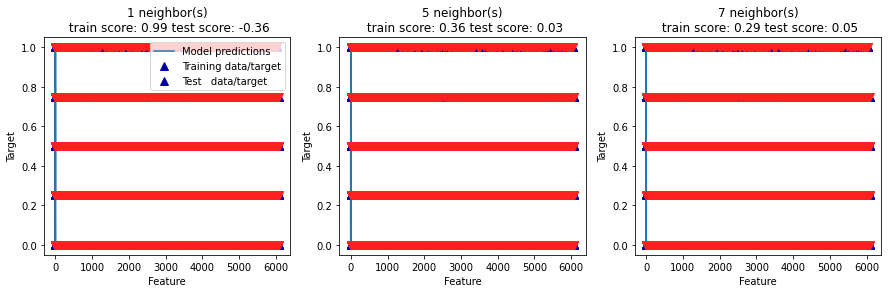

In [203]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 7295).reshape(-1, 1)
for n_neighbors, ax in zip([1, 5, 7], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(x_train, y_train)
    ax.plot(line, reg.predict(x_test))
    ax.plot(x_train, y_train, '^', c=mglearn.cm2(0),   markersize=8)
    ax.plot(x_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,reg.score(x_train, y_train),reg.score(x_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target","Test   data/target"], loc="best")

__Prediction Submission__
* Will be used later for competition